# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [16]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [17]:
# Load Data 
data = pd.read_csv("assignment2_data.csv", index_col = 0)
# 첫번째 컬럼을 인덱스 컬럼으로 잡음. 
# train data임 
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


### 데이터 전처리

In [19]:
# new_price는 널값 너무 많아서 제외하겠음. 
data.drop('New_Price', axis=1, inplace=True)

In [20]:
# 결측값 44개는 삭제. 44/6019 = 0.7% 
data.dropna(inplace=True)

In [21]:
# Mileage, Engine, Power 숫자화
# 일단 단위부터 떼어넨다. 
# Mileage
data["Mileage"] = data["Mileage"].str.split(" ", expand=True)[0].str.strip().astype(float)
# Engine
data["Engine"] = data["Engine"].str.split(" ", expand=True)[0].str.strip().astype(float)
# Power
data["Power"] = data["Power"].str.split(" ", expand=True)[0].str.strip()

<Axes: >

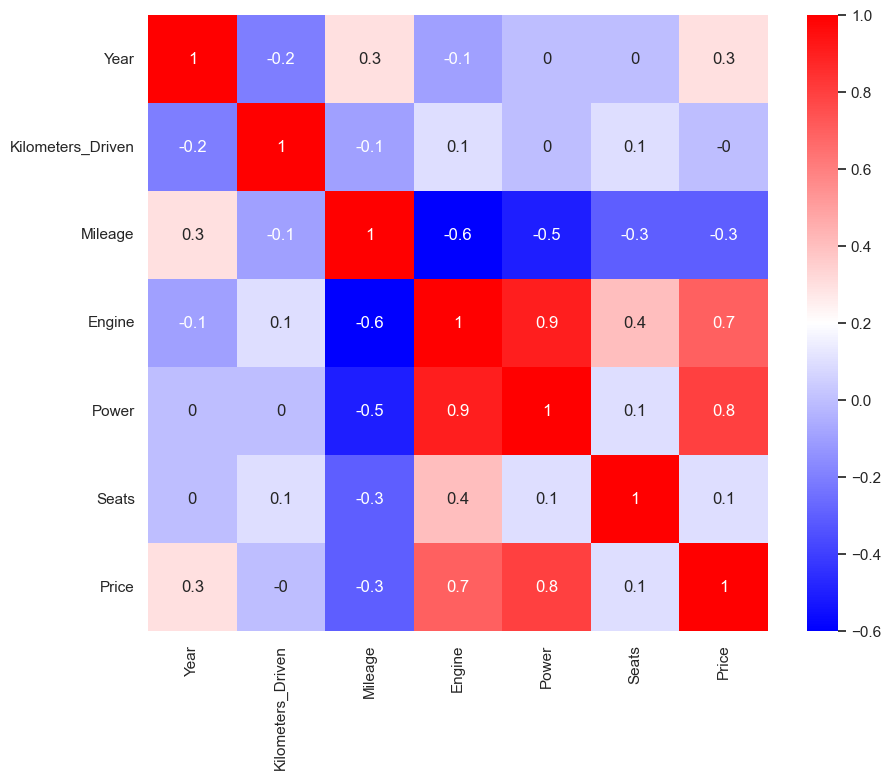

In [22]:
# null 제거하고 컬럼별 상관관계 보기
data_null = data[~data.Power.str.contains("null")]
data_null["Power"] = data_null["Power"].astype("float")
corr_mat = data_null.corr().round(1)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr')

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


dt1 = data[~(data["Power"] == "null")]
dt2 = data[(data["Power"] == "null")]
dt1["Power"] = dt1["Power"].astype(float)


lr = LinearRegression()
lr.fit(X=dt1[["Engine"]], y=dt1[["Power"]])
rmse =np.sqrt(mean_squared_error(dt1[["Power"]], lr.predict(dt1[["Engine"]])))

# power null 부분에 예측값으로 대체
data.loc[(data["Power"].str.split(" ", expand=True)[0].str.strip() == "null"), "Power"] = \
lr.predict(dt2[["Engine"]])


# Power도 새로 들어온 데이터 위해 다시 형변환
data['Power'] = data['Power'].astype(float)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 735.9+ KB


In [38]:
# 회귀 위해 object 삭제
train.drop(['Name','Location','Fuel_Type','Transmission','Owner_Type'], axis = 1)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2010,72000,26.60,998.0,58.16,5.0,1.75
1,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90
6017,2013,46000,18.90,998.0,67.10,5.0,2.65


## 회귀분석 & 회귀 진단
- 선형성
- 다중공선성
- 정규성
- 등분산성

#### 1. 선형성

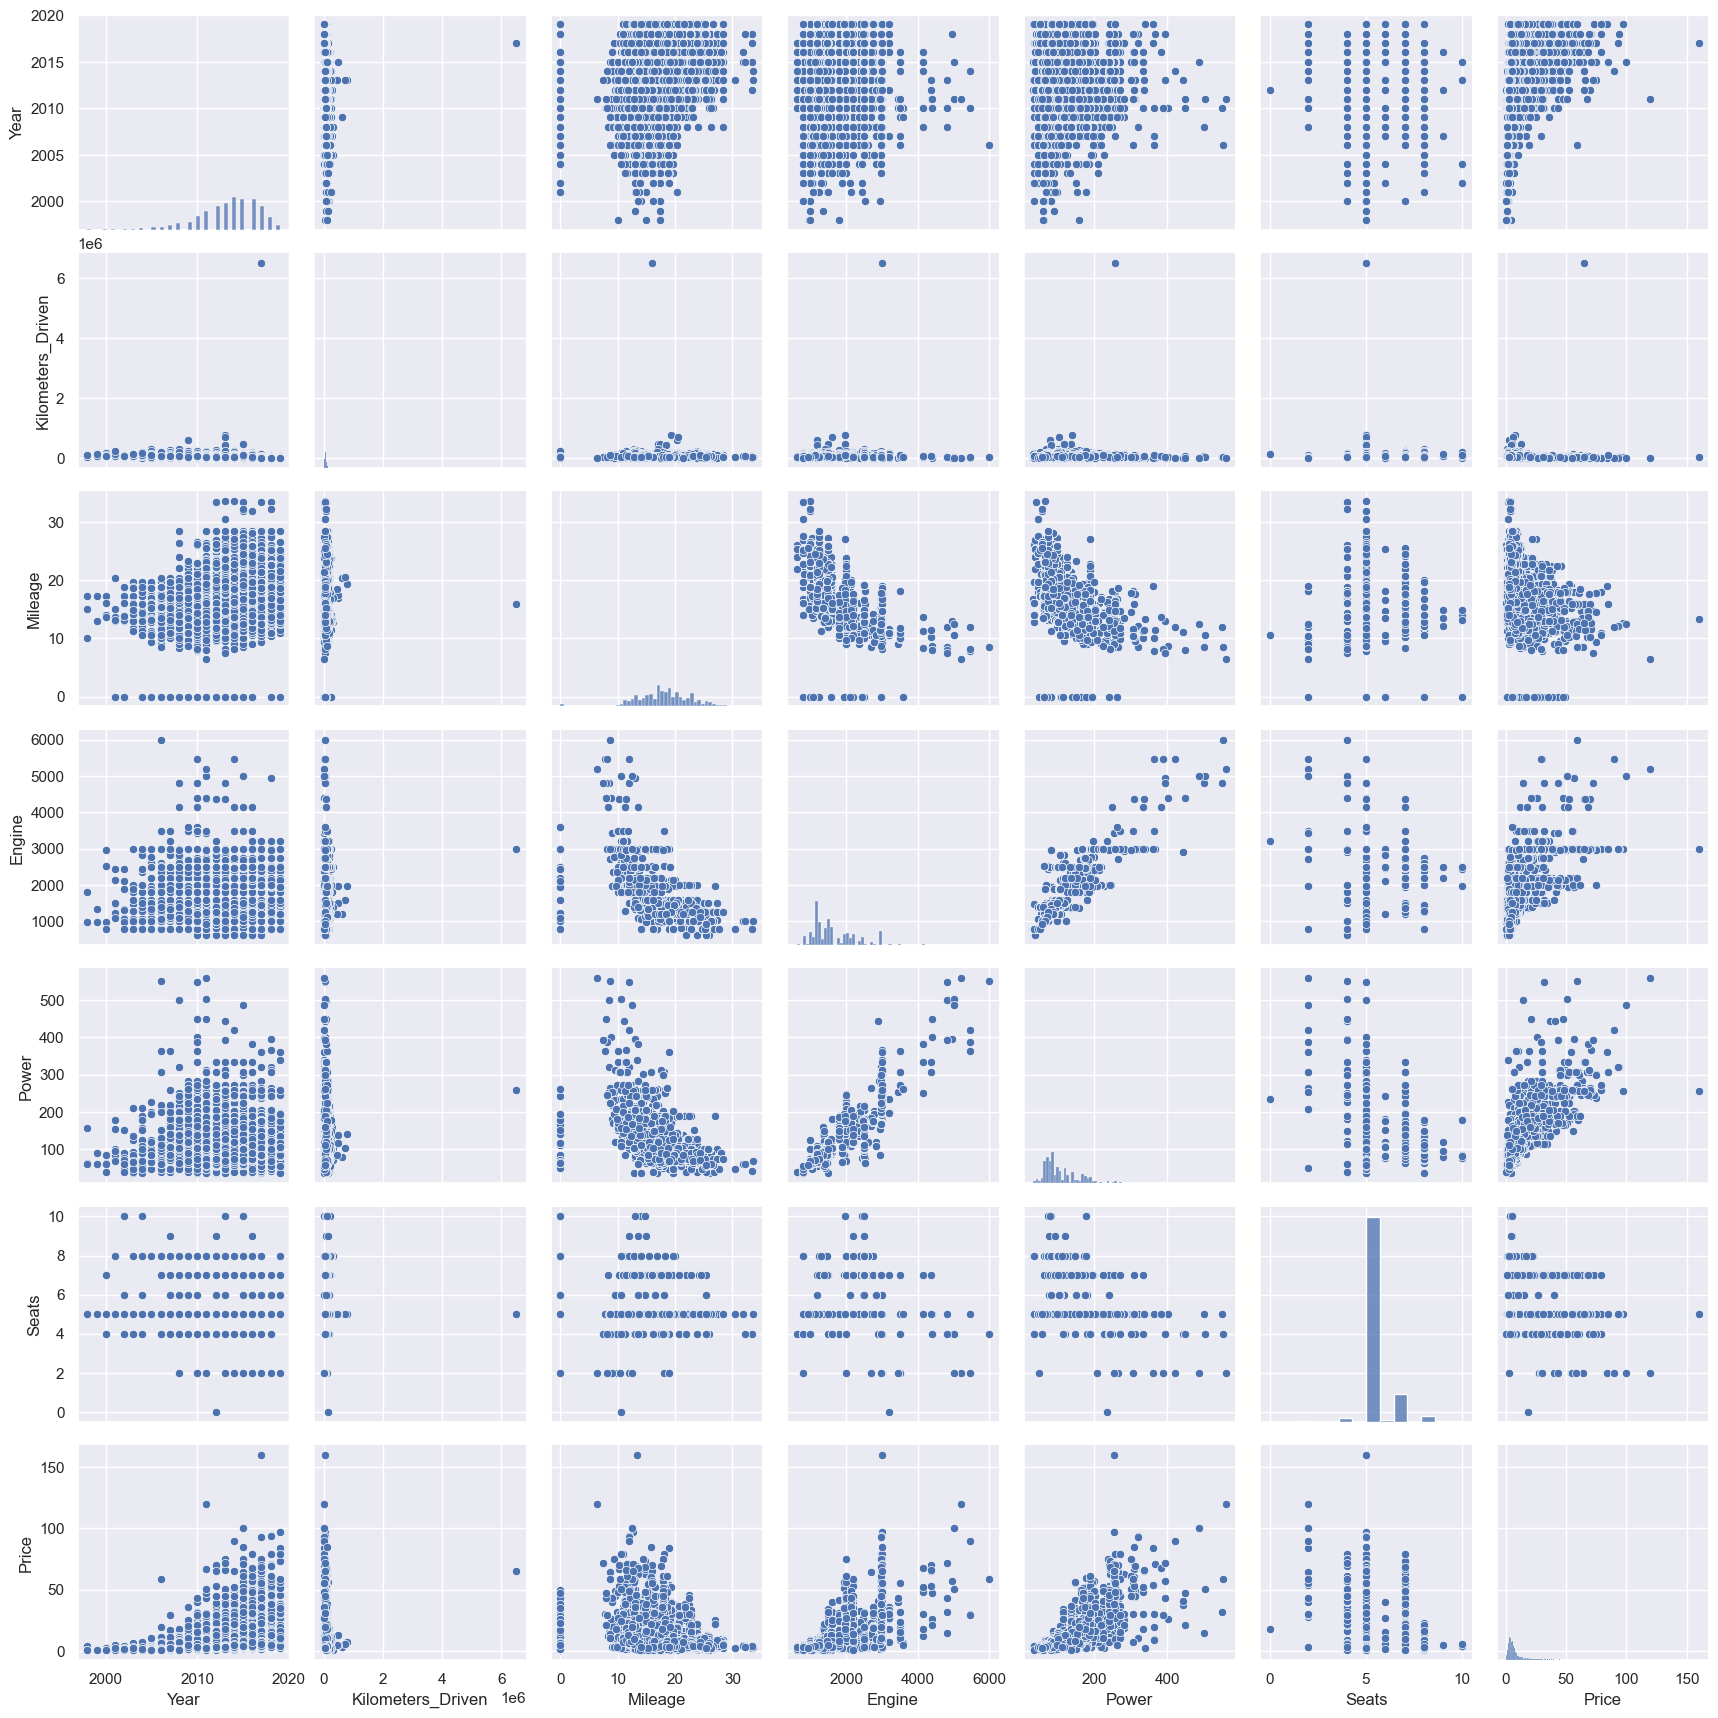

In [25]:
# 선형성 
sns.pairplot(data)
# 대부분의 변수들이 선형성을 만족하고 있지 않은 모습을 보인다. 

In [30]:
data.corr()['Price'].sort_values(ascending=False)

Price                1.000000
Power                0.772725
Engine               0.659117
Year                 0.305800
Seats                0.052262
Kilometers_Driven   -0.011263
Mileage             -0.313877
Name: Price, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [44]:
x = ['Power',"Engine","Year","Seats","Kilometers_Driven","Mileage"]
X = data[x]
y = data['Price']

#### 2. 다중공선성

In [51]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

# 어마무시하게 높은 숫자 ㅠㅠ 

,VIF Factor,features
2,114.722717,Year
3,72.518377,Seats
1,58.606684,Engine
0,30.772300,Power
5,27.279345,Mileage
4,1.435164,Kilometers_Driven


In [58]:
# 3개의 변수를 제거했더니 그나마 괜찮아진 모습... 
X3 = X.drop(['Year','Engine','Seats'], axis=1)

In [59]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif["features"] = X3.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
2,3.244996,Mileage
0,3.194700,Power
1,1.388240,Kilometers_Driven


In [60]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=0)

In [61]:
X3.head()

,Power,Kilometers_Driven,Mileage
0,58.16,72000,26.60
1,126.20,41000,19.67
2,88.70,46000,18.20
3,88.76,87000,20.77
4,140.80,40670,15.20


#### 선형회귀 모델 구축
- statsmodels의 OLS 이용하여 선형회귀분석 시행 

In [62]:
X_train=sm.add_constant(X_train) 
model=sm.OLS(y_train,X_train,axis=1)
model_trained=model.fit()

C:\Users\KSN\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


#### 3. 정규성 확인

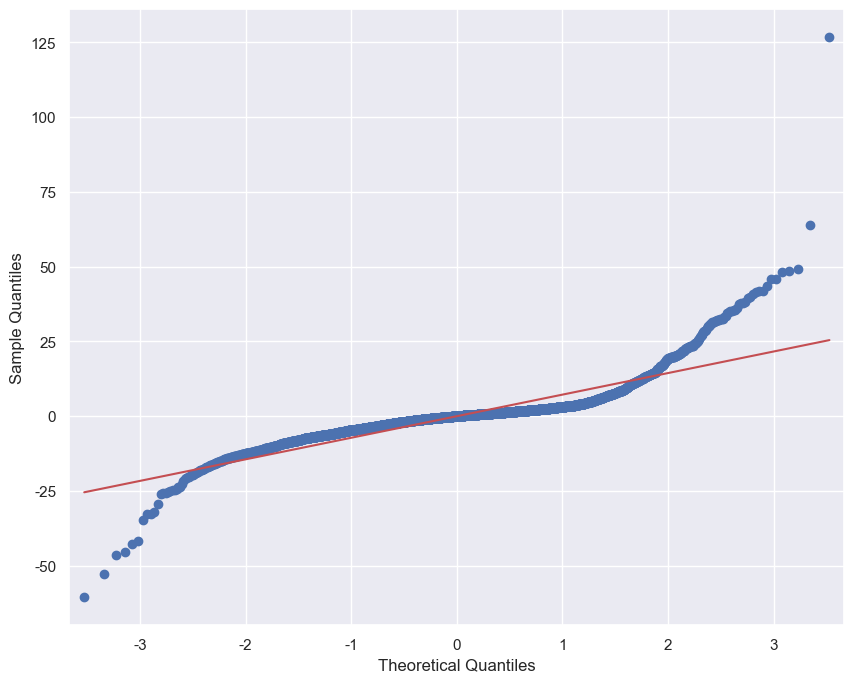

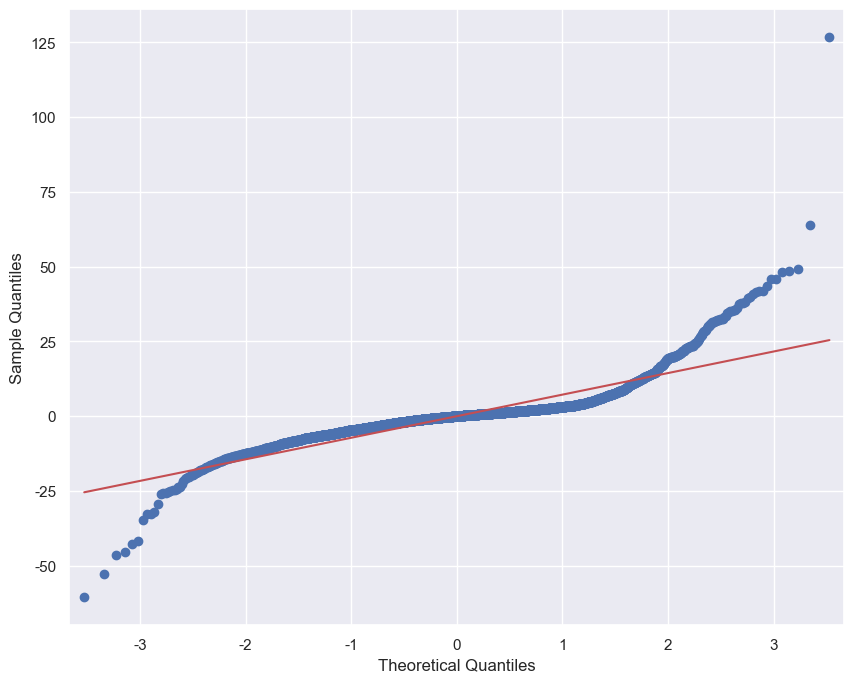

In [63]:
# 확률 오차의 정규성 확인
model_residuals=model_trained.resid

plt.rcParams["axes.unicode_minus"]=False #폰트 깨짐 방지
sm.ProbPlot(model_residuals).qqplot(line="s")

# 빨간색 실선을 잘 따라가는 모습 -> 확률오차가 정규성을 잘 따라가고 있음. 

#### 4. 등분산성 확인

Text(0, 0.5, 'residuals')

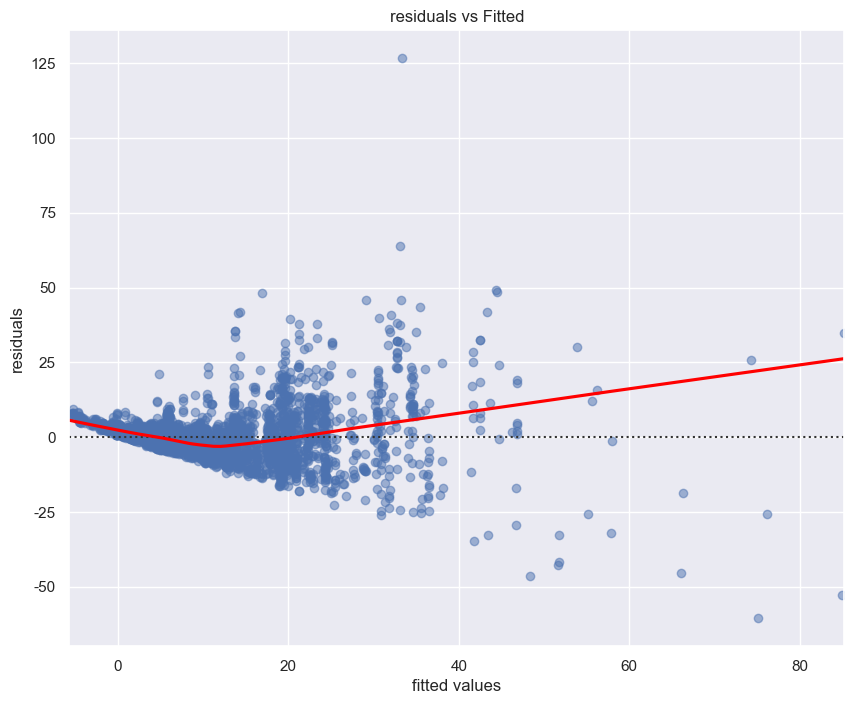

In [64]:
# 등분산성 확인 
model_fitted_y=model_trained.fittedvalues

sns.residplot(model_fitted_y, y_train,data=X_train, lowess=True, scatter_kws={"alpha":0.5},line_kws={"color":"red"})

plt.title("residuals vs Fitted")
plt.xlabel("fitted values")
plt.ylabel("residuals")

# 나름 일직선을 따라가는 모습을 보임. 

### 통계적인 해석
- 나쁘지 않은 r스퀘어 값을 보임

In [65]:
# 통계량 확인
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2407.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        05:44:08   Log-Likelihood:                -16225.
No. Observations:                4780   AIC:                         3.246e+04
Df Residuals:                    4776   BIC:                         3.248e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -15.3306      0.67